# Regressão linear simples

Importação de bibliotecas
    
    sklean: para criar o modelo de regressão
    
    yellowbrick: visualização de residuais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
import seaborn as srn

In [3]:
base = pd.read_csv('cars.csv')
base.shape

(50, 3)

In [5]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [7]:
base = base.drop(['Unnamed: 0'], axis= 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


Definição das variáveis X e Y

In [4]:
X = base['dist'].values
Y = base['speed'].values

## Cálculo da crrelação entre X e Y
### Usando numpy

In [15]:
correlacao = np.corrcoef(X,Y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

### Usando pandas

In [23]:
base.corr()

,speed,dist
speed,1.000000,0.806895
dist,0.806895,1.000000


## Criando o modelo
Formato de matriz com uma coluna a mais

In [5]:
X = X.reshape(-1,1)

modelo = LinearRegression()
modelo.fit(X, Y)

LinearRegression()

In [6]:
modelo.intercept_

8.283905641787172

In [7]:
modelo.coef_

array([0.16556757])

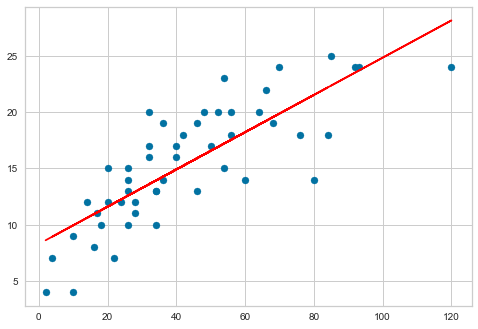

In [8]:
plt.scatter(X,Y)
plt.plot(X, modelo.predict(X), color='red')

In [10]:
dir(modelo)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_residues',
 '_set_intercept',
 '_validate_data',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'normalize',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

<AxesSubplot:>

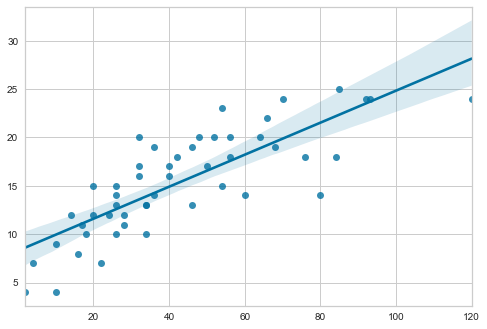

In [39]:
srn.regplot(x=X, y=Y, data=base, fit_reg=True)

#### Qual velocidade se levou 22 pés para frear?

In [33]:
modelo.predict([[22]])

array([11.92639228])

### Gráfico para visualizar os residuais

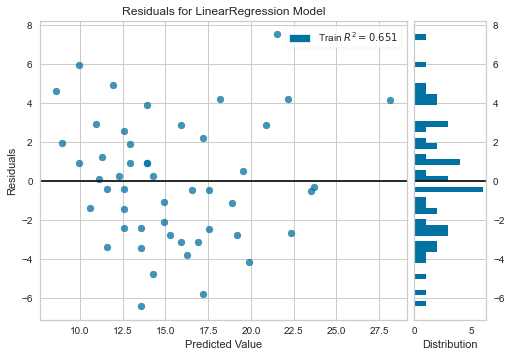

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [34]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, Y)
visualizador.poof()